In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
le=LabelEncoder()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [4]:
data=pd.read_csv('/kaggle/input/train.csv')

In [5]:
#Understanding Proportion of Null Values
data.isnull().mean()*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var1                           53.948748
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [6]:
del data['Var1']

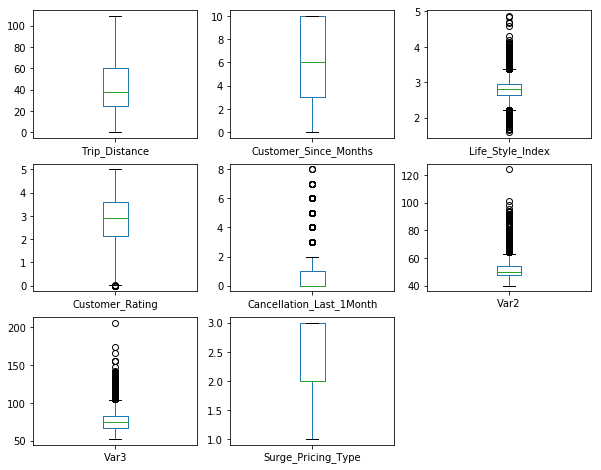

In [7]:
data.plot(kind='box', layout=(3,3),subplots=True,figsize=(10,8))
plt.show()

In [8]:
cat_list=list(data.select_dtypes(exclude='object'))
for i in cat_list:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    for j in range(0,len(data[i])):
        if data[i][j]>(q3+(1.5*iqr)) or data[i][j]<(q1-(1.5*iqr)):
            data[i][j]=data[i].mode()[0]

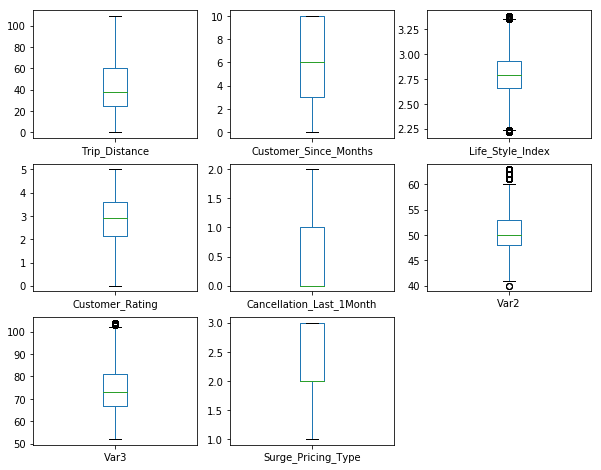

In [9]:
data.plot(kind='box', layout=(3,3),subplots=True,figsize=(10,8))
plt.show()

In [10]:
data.isnull().mean()*100

Trip_ID                         0.000000
Trip_Distance                   0.000000
Type_of_Cab                    15.349911
Customer_Since_Months           4.496362
Life_Style_Index               15.336999
Confidence_Life_Style_Index    15.336999
Destination_Type                0.000000
Customer_Rating                 0.000000
Cancellation_Last_1Month        0.000000
Var2                            0.000000
Var3                            0.000000
Gender                          0.000000
Surge_Pricing_Type              0.000000
dtype: float64

In [11]:
data['Type_of_Cab']=data['Type_of_Cab'].fillna(data['Type_of_Cab'].mode()[0])
data['Customer_Since_Months']=data['Customer_Since_Months'].fillna(round(data['Customer_Since_Months'].mean()))
data['Life_Style_Index']=data['Life_Style_Index'].fillna(data['Life_Style_Index'].mean())
data['Confidence_Life_Style_Index']=data['Confidence_Life_Style_Index'].fillna(data['Confidence_Life_Style_Index'].mode()[0])

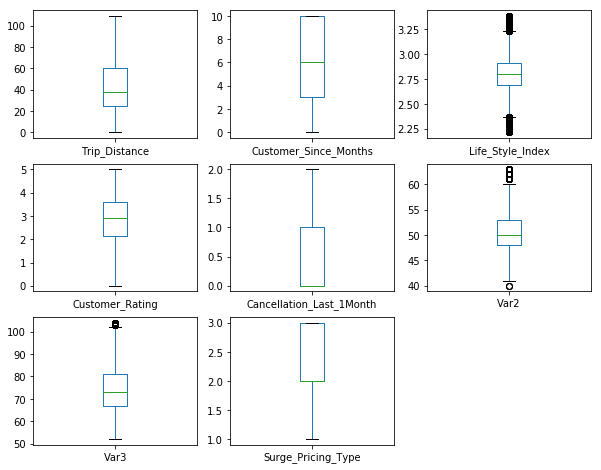

In [12]:
data.plot(kind='box', layout=(3,3),subplots=True,figsize=(10,8))
plt.show()

In [13]:
cat_list=list(data.select_dtypes(exclude='object'))
for i in cat_list:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    for j in range(0,len(data[i])):
        if data[i][j]>(q3+(1.5*iqr)) or data[i][j]<(q1-(1.5*iqr)):
            data[i][j]=data[i].mode()[0]

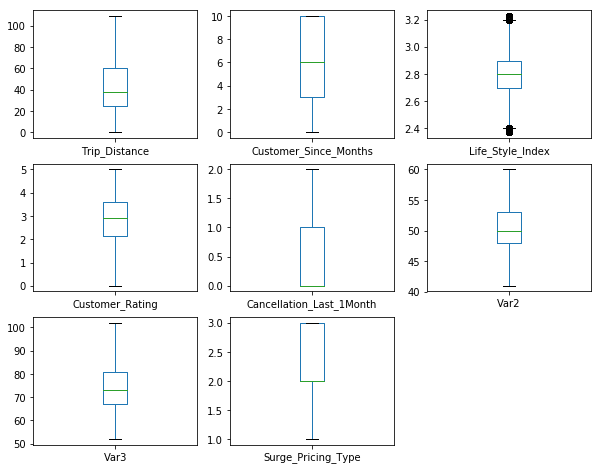

In [14]:
data.plot(kind='box', layout=(3,3),subplots=True,figsize=(10,8))
plt.show()

In [15]:
data_01=pd.concat([data.select_dtypes(include='object').apply(le.fit_transform),data.drop(data.select_dtypes(include='object'),axis=1)],axis=1)

In [16]:
x=data_01.drop('Surge_Pricing_Type',axis=1)
y=data_01['Surge_Pricing_Type']

In [17]:
x=ss.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [19]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
y_pred=dt.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.5515582672979062

In [22]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_pred=rf.predict(x_test)

In [24]:
accuracy_score(y_test,y_pred)

0.6488265525709511

In [25]:
params={'n_estimators':range(1,30)} # for Random Forest
gs_rf=GridSearchCV(rf,param_grid=params,return_train_score=True).fit(x_train,y_train)
y_pred=gs_rf.predict(x_test)
print('Accuracy Score is  ',accuracy_score(y_test,y_pred))
df_cv_result=pd.DataFrame(gs_rf.cv_results_)

Accuracy Score is   0.6719663788956682


(0, 10)

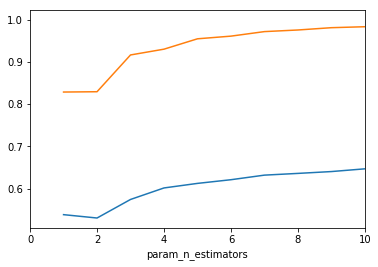

In [26]:
df_cv_result.set_index('param_n_estimators')['mean_test_score'].plot.line()
df_cv_result.set_index('param_n_estimators')['mean_train_score'].plot.line()
plt.xlim(0,10)

In [27]:
params={'max_depth':range(1,20)} # for Decision Tree
gs_dt=GridSearchCV(dt,param_grid=params,return_train_score=True).fit(x_train,y_train)
y_pred=gs_dt.predict(x_test)
print('Accuracy Score is  ',accuracy_score(y_test,y_pred))
df_cv_result=pd.DataFrame(gs_dt.cv_results_)

Accuracy Score is   0.6784728727309552


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

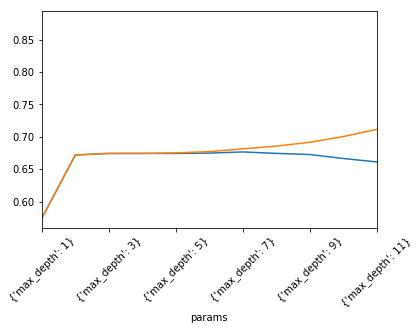

In [28]:
df_cv_result.set_index('params')['mean_test_score'].plot.line()
df_cv_result.set_index('params')['mean_train_score'].plot.line()
plt.xlim(0,10)
plt.xticks(rotation=45)
gs_dt.best_estimator_